In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.linalg as la

In [2]:
from fbpconvnet import *
from train import *

In [3]:
fbpcnn = fbpconvnet()

X_train, X_test, E_train, E_test = load_dataset('ellipses')

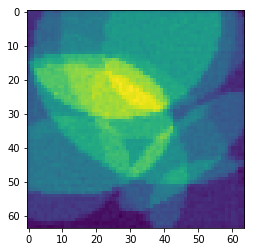

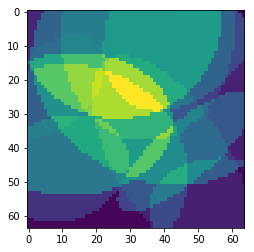

In [4]:
plt.figure(1);plt.imshow(X_train[2,:,:,0])
plt.figure(2);plt.imshow(E_train[2,:,:,0])

In [5]:
fbpcnn.compile(optimizer=tf.train.AdamOptimizer(), 
              loss=euclidean_loss,
              metrics=[euclidean_loss])
fbpcnn.fit(X_train, E_train,
          batch_size=1,
          epochs=20)

Epoch 1/20
20/20 [==============================] - 4s 221ms/step - loss: 9.3077 - euclidean_loss: 9.3077
Epoch 2/20
20/20 [==============================] - 4s 200ms/step - loss: 8.1565 - euclidean_loss: 8.1565
Epoch 3/20
20/20 [==============================] - 4s 201ms/step - loss: 8.1565 - euclidean_loss: 8.1565
Epoch 4/20
20/20 [==============================] - 4s 201ms/step - loss: 8.1565 - euclidean_loss: 8.1565
Epoch 5/20
20/20 [==============================] - 4s 203ms/step - loss: 8.1565 - euclidean_loss: 8.1565
Epoch 6/20
20/20 [==============================] - 4s 201ms/step - loss: 8.1565 - euclidean_loss: 8.1565
Epoch 7/20
20/20 [==============================] - 4s 201ms/step - loss: 8.1565 - euclidean_loss: 8.1565
Epoch 8/20
20/20 [==============================] - 4s 202ms/step - loss: 8.1565 - euclidean_loss: 8.15652s - loss: 8.3234 - 
Epoch 9/20
20/20 [==============================] - 4s 202ms/step - loss: 8.1565 - euclidean_loss: 8.1565
Epoch 10/20
20/20 [=======

In [6]:
test_loss, test_acc = fbpcnn.evaluate(X_test, E_test)
print(test_loss, test_acc)

5/5 [==============================] - 0s 69ms/step
8.696861267089844 8.696861267089844


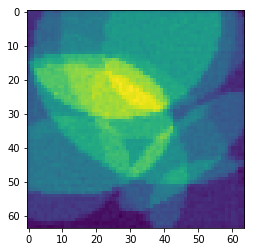

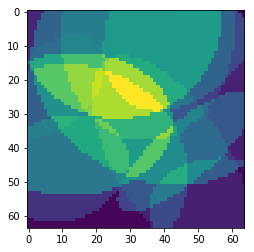

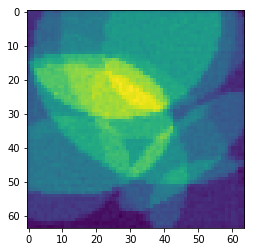

In [8]:
X_recon = fbpcnn.predict(X_train)
plt.figure(1);plt.imshow(X_train[2,:,:,0])
plt.figure(2);plt.imshow(E_train[2,:,:,0])
plt.figure(3);plt.imshow(X_recon[2,:,:,0])

In [11]:
la.norm(E_train[2,:,:,0].flatten() - X_recon[2,:,:,0].flatten())

7.996546255473913

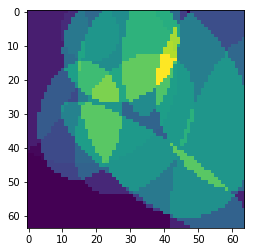

In [15]:
plt.imshow(E_test[0,:,:,0])